## ASHW_01

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.neighbors import KernelDensity
from astropy.visualization import hist
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import pylab as plb

In [3]:
import math

### 1. zadatak

In [6]:
# Генерисати N (гдjе jе N велики броj) случаjних узорака из униформне расподjеле
# у интервалу [a, b] и сачувати их као x;

random_state = np.random.RandomState(seed=0)
N = 10000 # broj generisanih podataka
a = 1 #donja granica
b = 1000 #gornja granica


mu_gamma_f = [((a+(b-a)/6),    (b-a)/6,0.2),
              ((a+2*(b-a)/6), (b-a)/6,0.2),
              ((a+3*(b-a)/6), (b-a)/6,0.2),
              (a+4*(b-a)/6,  (b-a)/6,0.2),
              ((a+5*(b-a)/6) ,  (b-a)/6,0.2),
             ]

#mu_gamma_f = [(20,5.0,0.2),
#              (40,5.0,0.2),
#              (30,5.0,0.2),
#              (50,5.0,0.2),
#              (10,5.0,0.2),
#             ]


# funkcija gustina verovatnoce
hx = lambda x: sum([f * stats.cauchy(mu, gamma).pdf(x)
                          for (mu, gamma, f) in mu_gamma_f])

x = np.concatenate([stats.cauchy(mu, gamma).rvs(int(f * N), random_state=random_state)
                    for (mu, gamma, f) in mu_gamma_f])


random_state.shuffle(x)

x = x[x > a]
x = x[x < b]

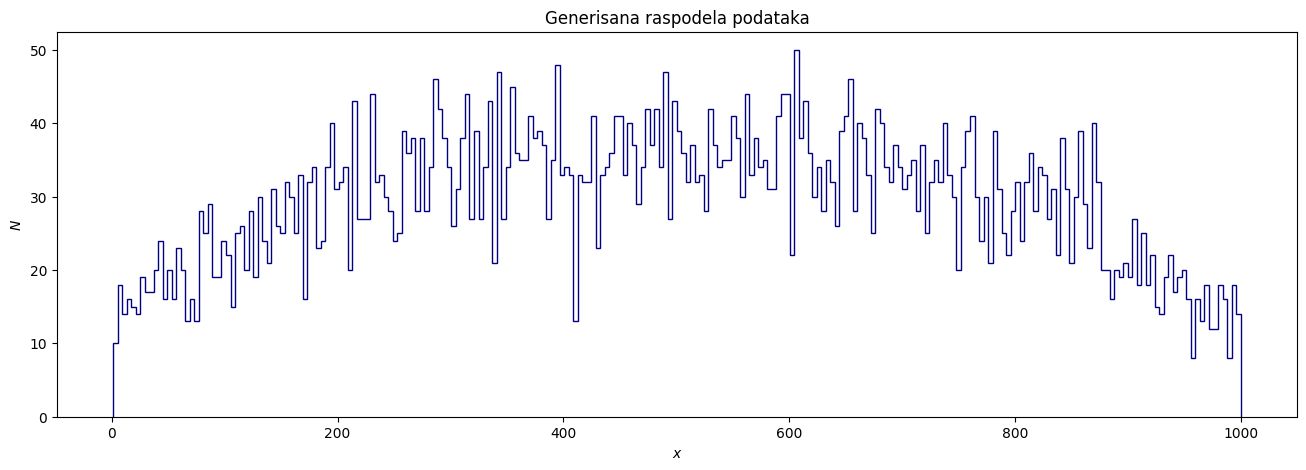

In [8]:
# Направити хистограм ових узорака;

plt.figure(figsize=(16,5))
plt.hist(x, bins=250, color='navy', histtype='step')
plt.xlabel(r'$x$')
plt.ylabel(r'$N$')
plt.title("Generisana raspodela podataka")
plt.savefig("generisana_raspodela_x")
plt.show()

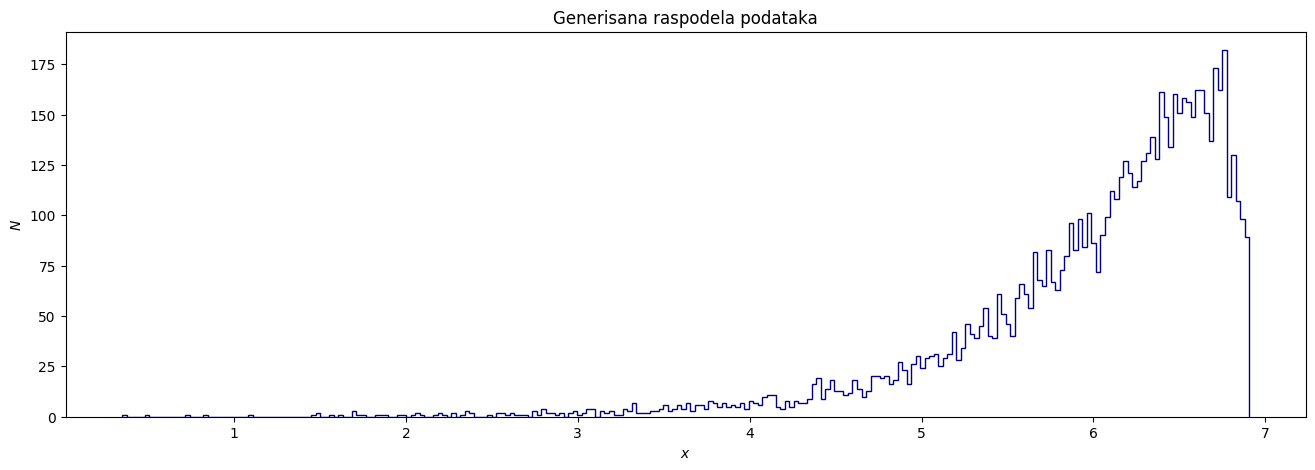

In [14]:
# Израчунати природни логаритам (ln) низа x и сачувати га као y
y = np.log(x)

# Направити нови хистограм за y;
plt.figure(figsize=(16,5))
plt.hist(y, bins=250, color='navy', histtype='step')
plt.xlabel(r'$x$')
plt.ylabel(r'$N$')
plt.title('Generisana raspodela podataka')
plt.savefig("log_x_generisana_raspodela.jpg")
plt.show()

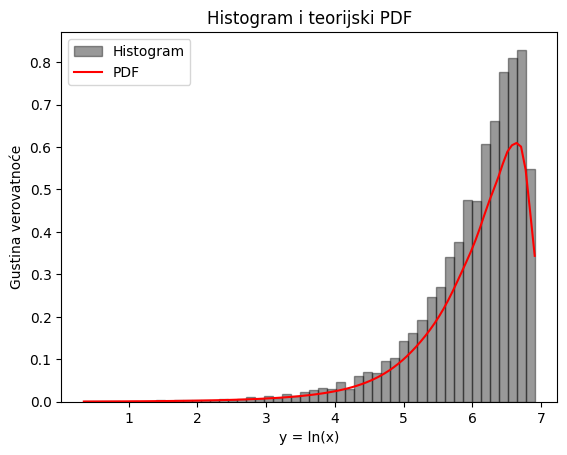

In [24]:
y = np.log(x)

# tacke na x osi za y vrednosti - pravimo grid
y_vrednosti = np.linspace(min(y), max(y), 100)
#transformacija PDF
pdf_y = hx(np.exp(y_vrednosti)) * np.exp(y_vrednosti)

# Plotovanje histograma i teoretskog PDF-a
plt.hist(y, bins=50, density=True,alpha = 0.4, color='black', edgecolor='black', label="Histogram")
plt.plot(y_vrednosti, pdf_y,'r-', label="PDF")
plt.xlabel("y = ln(x)")
plt.ylabel("Gustina verovatnoće")
plt.title("Histogram i teorijski PDF")
plt.legend()
plt.savefig("histogram_pdf.jpg")
plt.show()

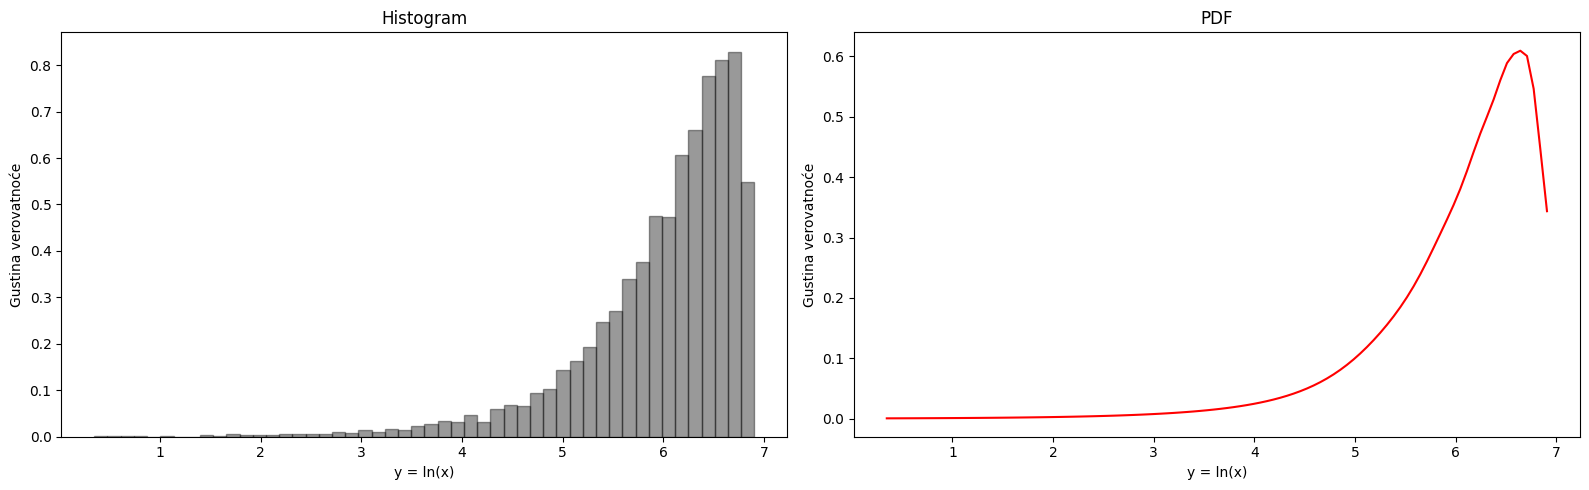

In [26]:
# Тражене плотове приказати jедан поред другог

fig, axes = plt.subplots(1, 2, figsize=(16, 5))  # 1 red, 2 kolone

# Histogram
axes[0].hist(y, bins=50, density=True, alpha=0.4, color='black', edgecolor='black')
axes[0].set_xlabel("y = ln(x)")
axes[0].set_ylabel("Gustina verovatnoće")
axes[0].set_title("Histogram")

# PDF
axes[1].plot(y_vrednosti, pdf_y, 'r-', label="Teoretski PDF")
axes[1].set_xlabel("y = ln(x)")
axes[1].set_ylabel("Gustina verovatnoće")
axes[1].set_title("PDF")

plt.savefig("histo_pdf.jpg")
plt.tight_layout()
plt.show()

### 2. zadatak

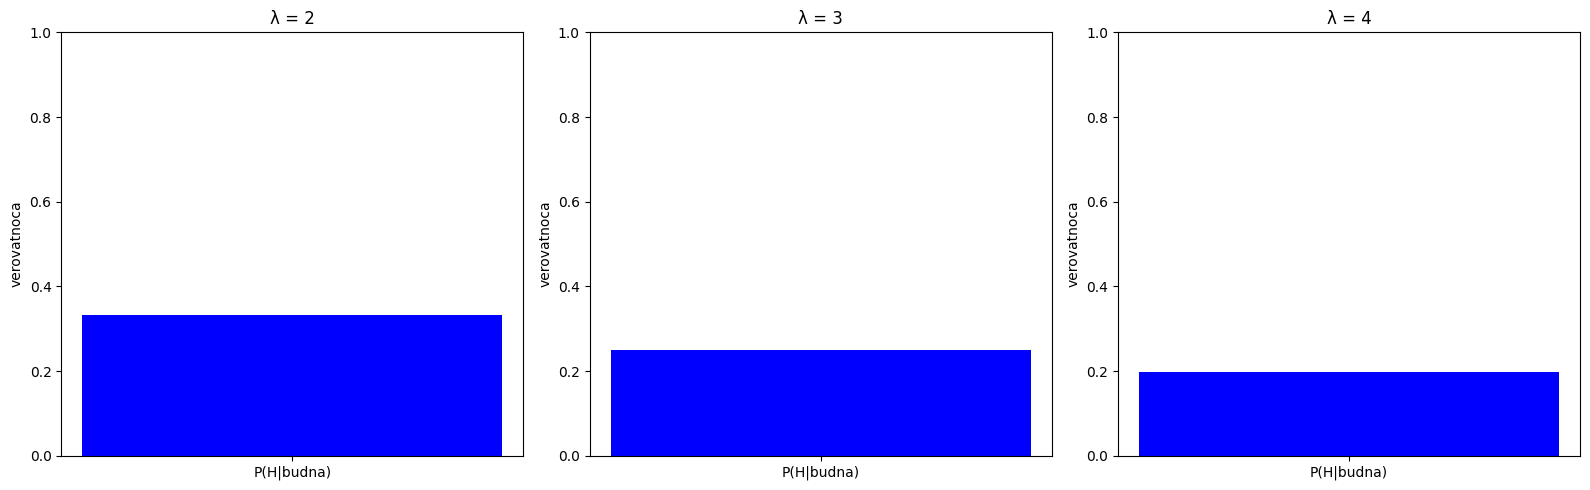

0.3332000533120085
0.25009378516943853
0.1984126984126984


In [193]:
#verovatnoce ishoda pada novcica na glavu i pismo
p_H = 0.65
p_T = 1 - p_H
# broj budjenja
N = 10000
lambda_vred = [2,3,4]

#bacamo novcic
def bacanje_novcica(lambda_vred):
    #ako padne H=glava onda je budimo u pon
    budna_H = N
    #ako padne T=pismo onda Poasonova raspodela
    budna_T = np.sum(np.random.poisson(lambda_vred, size= N))

    #lepotica racuna sansu da je bila glava - Bajesova formula
    p_budna_H = budna_H / (budna_H + budna_T)
    return p_budna_H

# ubacujemo rezultate simulacija
rezultati = {lambda_vred: bacanje_novcica(lambda_vred) for lambda_vred in lambda_vred}

#plotujemo vrednosti
fig,axes = plt.subplots(1,len(lambda_vred), figsize = (16,5))

for i,lambda_vred in enumerate(lambda_vred):
    axes[i].bar(['P(H|budna)'], [rezultati[lambda_vred]], color = 'blue')
    axes[i].set_ylim(0,1) # p pripada {0,1}
    axes[i].set_title(f"λ = {lambda_vred}")
    axes[i].set_ylabel('verovatnoca')

plt.tight_layout()
plt.show()

#ispis rezultata

for i in rezultati.values():
    print(i)

In [199]:
#rezultati
for lambda_vred, prob in rezultati.items():
    print(f"P(H | budna) za λ = {lambda_vred}: {prob:.4f}")

P(H | budna) za λ = 2: 0.3332
P(H | budna) za λ = 3: 0.2501
P(H | budna) za λ = 4: 0.1984
